<a href="https://colab.research.google.com/github/Aafaaq77/appliedDataSciencewithPython/blob/main/P4DataScienceAssigment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import re

%matplotlib inline

# Cities and their Sports teams in major US leagues

In [2]:
url = 'https://en.wikipedia.org/wiki/List_of_American_and_Canadian_cities_by_number_of_major_professional_sports_franchises'
cities = pd.read_html(url)[1]
cities.head()

,Metropolitan area,Country,Pop.rank,Population (2016 est.)[8],B4,NFL,MLB,NBA,NHL,B6,MLS,CFL
0,New York City,United States,1,20153634,9,GiantsJets[note 1],YankeesMets[note 2],KnicksNets,RangersIslandersDevils[note 3],11,Red BullsNew York City FC,—
1,Los Angeles,United States,2,13310447,8,RamsChargers[note 4],DodgersAngels,LakersClippers,KingsDucks,10,GalaxyLos Angeles FC[note 5],—
2,Chicago,United States,3,9512999,5,Bears[note 6],CubsWhite Sox,Bulls[note 7],Blackhawks,6,Fire,—
3,San Francisco Bay Area,United States,6,6657982,5,49ers[note 8],GiantsAthletics,Warriors,Sharks[note 9],6,Earthquakes,—
4,Dallas–Fort Worth,United States,4,7233323,4,Cowboys,Rangers,Mavericks,Stars,5,FC Dallas,—


In [3]:
clean_data_cell = lambda cell: cell[:cell.index('[')] if '[' in cell else cell
cities = pd.read_html(url, converters={'NFL':clean_data_cell,
                                       'MLB': clean_data_cell,
                                       'NBA': clean_data_cell,
                                       'NHL': clean_data_cell})[1]
cities = cities.iloc[:-1,[0,3,5,6,7,8]] # selecting city, nfl, nhl, nba and mlb columns
cities.head()

,Metropolitan area,Population (2016 est.)[8],NFL,MLB,NBA,NHL
0,New York City,20153634,GiantsJets,YankeesMets,KnicksNets,RangersIslandersDevils
1,Los Angeles,13310447,RamsChargers,DodgersAngels,LakersClippers,KingsDucks
2,Chicago,9512999,Bears,CubsWhite Sox,Bulls,Blackhawks
3,San Francisco Bay Area,6657982,49ers,GiantsAthletics,Warriors,Sharks
4,Dallas–Fort Worth,7233323,Cowboys,Rangers,Mavericks,Stars


In [4]:
cities.dtypes

Metropolitan area            object
Population (2016 est.)[8]    object
NFL                          object
MLB                          object
NBA                          object
NHL                          object
dtype: object

In [5]:
cities.columns 

Index(['Metropolitan area', 'Population (2016 est.)[8]', 'NFL', 'MLB', 'NBA',
       'NHL'],
      dtype='object')

In [6]:
# changing column names
cities.columns = ['Metropolitan area', 'Population', 'NFL', 'MLB', 'NBA','NHL']

In [7]:
cities['Population'] = cities['Population'].astype(int)

# Reading in the NHL dataset

In [13]:
nhl_df = pd.read_csv('nhl.csv', skiprows=[1])
nhl_df

,team,GP,W,L,OL,PTS,PTS%,GF,GA,SRS,SOS,RPt%,ROW,year,League
0,Tampa Bay Lightning*,82,54,23,5,113,.689,296,236,0.66,-0.07,.634,48,2018,NHL
1,Boston Bruins*,82,50,20,12,112,.683,270,214,0.62,-0.07,.610,47,2018,NHL
2,Toronto Maple Leafs*,82,49,26,7,105,.640,277,232,0.49,-0.06,.567,42,2018,NHL
3,Florida Panthers,82,44,30,8,96,.585,248,246,-0.01,-0.04,.537,41,2018,NHL
4,Detroit Red Wings,82,30,39,13,73,.445,217,255,-0.48,-0.01,.341,25,2018,NHL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,Los Angeles Kings*,82,46,28,8,100,.610,206,174,0.40,0.01,.549,38,2014,NHL
166,Phoenix Coyotes,82,37,30,15,89,.543,216,231,-0.16,0.03,.457,31,2014,NHL
167,Vancouver Canucks,82,36,35,11,83,.506,196,223,-0.30,0.03,.451,31,2014,NHL
168,Calgary Flames,82,35,40,7,77,.470,209,241,-0.35,0.04,.402,28,2014,NHL


# Cleaning the team column and dropping the columns which are not needed and then selecting only the data from 2018

In [16]:
cols = ['team', 'GP', 'W', 'L', 'year']
nhl_df = nhl_df[cols]
nhl_df.loc[:,'team'] = nhl_df['team'].str.strip('*')
mask = nhl_df['team'].str.endswith('Division')
nhl_df.drop(nhl_df[mask].index, inplace=True)
nhl_df = nhl_df[nhl_df['year'] == 2018]
nhl_df.head(10)

,team,GP,W,L,year
0,Tampa Bay Lightning,82,54,23,2018
1,Boston Bruins,82,50,20,2018
2,Toronto Maple Leafs,82,49,26,2018
3,Florida Panthers,82,44,30,2018
4,Detroit Red Wings,82,30,39,2018
5,Montreal Canadiens,82,29,40,2018
6,Ottawa Senators,82,28,43,2018
7,Buffalo Sabres,82,25,45,2018
9,Washington Capitals,82,49,26,2018
10,Pittsburgh Penguins,82,47,29,2018


### How should we get the name of sports teams from cities dataframe and then match the city name to every team in the nhl dataframe?

In [17]:
nhl_df.loc[:5, 'team'].str.split()

0    [Tampa, Bay, Lightning]
1           [Boston, Bruins]
2    [Toronto, Maple, Leafs]
3        [Florida, Panthers]
4      [Detroit, Red, Wings]
5      [Montreal, Canadiens]
Name: team, dtype: object

In [19]:
cities.loc[:5, 'NHL']
# three teams in the first row!!!

0    RangersIslandersDevils
1                KingsDucks
2                Blackhawks
3                    Sharks
4                     Stars
5                  Capitals
Name: NHL, dtype: object

In [22]:
region_mapping = {}
def map_city(row):
    teams = row['NHL']
    if isinstance(teams, str):
        res = re.findall(r'([A-Z]{1,1}[a-z]+)', teams)
        if res:
            for team in res:
                region_mapping[team] = row['Metropolitan area']
    return row

In [23]:
cities.apply(map_city, axis='columns');

In [24]:
region_mapping

{'Avalanche': 'Denver',
 'Blackhawks': 'Chicago',
 'Blue': 'Columbus',
 'Blues': 'St. Louis',
 'Bruins': 'Boston',
 'Canadiens': 'Montreal',
 'Canucks': 'Vancouver',
 'Capitals': 'Washington, D.C.',
 'Coyotes': 'Phoenix',
 'Devils': 'New York City',
 'Ducks': 'Los Angeles',
 'Flames': 'Calgary',
 'Flyers': 'Philadelphia',
 'Golden': 'Las Vegas',
 'Hurricanes': 'Raleigh',
 'Islanders': 'New York City',
 'Jackets': 'Columbus',
 'Jets': 'Winnipeg',
 'Kings': 'Los Angeles',
 'Knights': 'Las Vegas',
 'Kraken': 'Seattle',
 'Leafs': 'Toronto',
 'Lightning': 'Tampa Bay Area',
 'Maple': 'Toronto',
 'Oilers': 'Edmonton',
 'Panthers': 'Miami–Fort Lauderdale',
 'Penguins': 'Pittsburgh',
 'Predators': 'Nashville',
 'Rangers': 'New York City',
 'Red': 'Detroit',
 'Sabres': 'Buffalo',
 'Senators': 'Ottawa',
 'Sharks': 'San Francisco Bay Area',
 'Stars': 'Dallas–Fort Worth',
 'Wild': 'Minneapolis–Saint Paul',
 'Wings': 'Detroit'}

In [28]:
team = 'RangersIslandersDevils'
re.findall(r'([A-Z]{1,1}[a-z]+)', team)

['Rangers', 'Islanders', 'Devils']

In [29]:
def create_region(row):
    names = row['team'].split()
    if names[-1] in region_mapping:
        return region_mapping[names[-1]]

### City name for every team in the league

In [30]:
nhl_df['Metropolitan area'] = nhl_df.apply(create_region, axis=1)

In [31]:
nhl_df.head()

,team,GP,W,L,year,Metropolitan area
0,Tampa Bay Lightning,82,54,23,2018,Tampa Bay Area
1,Boston Bruins,82,50,20,2018,Boston
2,Toronto Maple Leafs,82,49,26,2018,Toronto
3,Florida Panthers,82,44,30,2018,Miami–Fort Lauderdale
4,Detroit Red Wings,82,30,39,2018,Detroit


In [32]:
nhl_df.dtypes

team                 object
GP                   object
W                    object
L                    object
year                  int64
Metropolitan area    object
dtype: object

In [35]:
# data types of wins and losses columns needed to be changed
nhl_df = nhl_df.astype({'W': int, 'L': int})

### Now merging the two dataframes

In [36]:
combined_df = pd.merge(nhl_df, cities, how='inner', on='Metropolitan area')
combined_df.head()

,team,GP,W,L,year,Metropolitan area,Population,NFL,MLB,NBA,NHL
0,Tampa Bay Lightning,82,54,23,2018,Tampa Bay Area,3032171,Buccaneers,Rays,NaN,Lightning
1,Boston Bruins,82,50,20,2018,Boston,4794447,Patriots,Red Sox,Celtics,Bruins
2,Toronto Maple Leafs,82,49,26,2018,Toronto,5928040,—,Blue Jays,Raptors,Maple Leafs
3,Florida Panthers,82,44,30,2018,Miami–Fort Lauderdale,6066387,Dolphins,Marlins,Heat,Panthers
4,Detroit Red Wings,82,30,39,2018,Detroit,4297617,Lions,Tigers,Pistons,Red Wings


### calculation of win/loss ratio for every team

In [37]:
combined_df['W/L'] = combined_df['W']/(combined_df['W']+combined_df['L'])

In [38]:
combined_df.head()

,team,GP,W,L,year,Metropolitan area,Population,NFL,MLB,NBA,NHL,W/L
0,Tampa Bay Lightning,82,54,23,2018,Tampa Bay Area,3032171,Buccaneers,Rays,NaN,Lightning,0.701299
1,Boston Bruins,82,50,20,2018,Boston,4794447,Patriots,Red Sox,Celtics,Bruins,0.714286
2,Toronto Maple Leafs,82,49,26,2018,Toronto,5928040,—,Blue Jays,Raptors,Maple Leafs,0.653333
3,Florida Panthers,82,44,30,2018,Miami–Fort Lauderdale,6066387,Dolphins,Marlins,Heat,Panthers,0.594595
4,Detroit Red Wings,82,30,39,2018,Detroit,4297617,Lions,Tigers,Pistons,Red Wings,0.434783


In [39]:
# now grouping (some cities have more than one teams)
regions = combined_df.set_index('Metropolitan area').groupby('Metropolitan area').mean()

In [40]:
regions.shape

(28, 5)

In [41]:
regions_nhl = regions[['Population', 'W/L']]
regions_nhl.head()

,Population,W/L
Metropolitan area,,
Boston,4794447,0.714286
Buffalo,1132804,0.357143
Calgary,1392609,0.513889
Chicago,9512999,0.458333
Columbus,2041520,0.600000


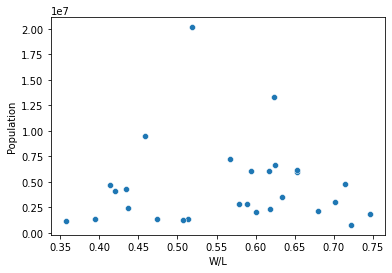

In [46]:
sns.scatterplot(x='W/L', y='Population', data=regions_nhl)

### correlation between w/l of all teams of cities and the populations

In [48]:
stats.pearsonr(regions['Population'], regions['W/L'])
# (corr, confindence)

(0.012486162921209907, 0.9497182859911791)

# Now reading in the NBA Dataset and repeating the same process

In [49]:
nba_df = pd.read_csv('nba.csv')

In [50]:
nba_df = nba_df[nba_df['year'] == 2018]
nba_df.head()

,team,W,L,W/L%,GB,PS/G,PA/G,SRS,year,League
0,Toronto Raptors* (1),59,23,0.72,—,111.7,103.9,7.29,2018,NBA
1,Boston Celtics* (2),55,27,0.6709999999999999,4.0,104.0,100.4,3.23,2018,NBA
2,Philadelphia 76ers* (3),52,30,0.634,7.0,109.8,105.3,4.3,2018,NBA
3,Cleveland Cavaliers* (4),50,32,0.61,9.0,110.9,109.9,0.59,2018,NBA
4,Indiana Pacers* (5),48,34,0.585,11.0,105.6,104.2,1.18,2018,NBA


In [51]:
nba_df.dtypes

team      object
W         object
L         object
W/L%      object
GB        object
PS/G      object
PA/G      object
SRS       object
year       int64
League    object
dtype: object

In [52]:
nba_df['W'] = nba_df['W'].astype(int)
nba_df['L'] = nba_df['L'].astype(int)

In [53]:
import unicodedata

In [54]:
def clean_teams(row):
  # team_name = row['team']
    team = unicodedata.normalize('NFKD', row['team'])
    row['team'] = re.sub(r"[* ]*\(\d+\)", "", team)
    return row

In [55]:
nba_df = nba_df.apply(clean_teams, axis=1)

In [56]:
nba_df.head(8)

,team,W,L,W/L%,GB,PS/G,PA/G,SRS,year,League
0,Toronto Raptors,59,23,0.72,—,111.7,103.9,7.29,2018,NBA
1,Boston Celtics,55,27,0.6709999999999999,4.0,104.0,100.4,3.23,2018,NBA
2,Philadelphia 76ers,52,30,0.634,7.0,109.8,105.3,4.3,2018,NBA
3,Cleveland Cavaliers,50,32,0.61,9.0,110.9,109.9,0.59,2018,NBA
4,Indiana Pacers,48,34,0.585,11.0,105.6,104.2,1.18,2018,NBA
5,Miami Heat,44,38,0.537,15.0,103.4,102.9,0.15,2018,NBA
6,Milwaukee Bucks,44,38,0.537,15.0,106.5,106.8,-0.45,2018,NBA
7,Washington Wizards,43,39,0.524,16.0,106.6,106.0,0.53,2018,NBA


In [57]:
nba_df.drop(nba_df[nba_df['team'].str.endswith('Division')].index, inplace=True) 
cols = ['team', 'W','L', 'year']
nba_df = nba_df[cols]
nba_df.head()

,team,W,L,year
0,Toronto Raptors,59,23,2018
1,Boston Celtics,55,27,2018
2,Philadelphia 76ers,52,30,2018
3,Cleveland Cavaliers,50,32,2018
4,Indiana Pacers,48,34,2018


In [61]:
region_mapping = {}
def map_city(row):
    teams = row['NBA']
    if isinstance(teams, str):
        res = re.findall(r'([A-Z]{1,1}[a-z]+)', teams)
        if res:
            for team in res:
                region_mapping[team] = row['Metropolitan area']
        else:
            region_mapping[teams] = row['Metropolitan area']
    return row

In [62]:
cities.apply(map_city,axis='columns');

In [63]:
len(region_mapping)

32

In [64]:
def create_region(row):
    names = row['team'].split()
    if names[-1] in region_mapping:
        return region_mapping[names[-1]]

In [65]:
nba_df['Metropolitan area'] = nba_df.apply(create_region, axis=1)

In [66]:
nba_df.head()

,team,W,L,year,Metropolitan area
0,Toronto Raptors,59,23,2018,Toronto
1,Boston Celtics,55,27,2018,Boston
2,Philadelphia 76ers,52,30,2018,Philadelphia
3,Cleveland Cavaliers,50,32,2018,Cleveland
4,Indiana Pacers,48,34,2018,Indianapolis


In [67]:
combined_df = pd.merge(cities, nba_df, how='inner', on='Metropolitan area')

In [68]:
combined_df.dtypes

Metropolitan area    object
Population            int64
NFL                  object
MLB                  object
NBA                  object
NHL                  object
team                 object
W                     int64
L                     int64
year                  int64
dtype: object

In [69]:
combined_df['W/l'] = combined_df['W'] / (combined_df['W'] + combined_df['L'])
cols = ['Metropolitan area', 'Population', 'W', 'L','W/l']
combined_df = combined_df[cols]

In [70]:
combined_df.head()

,Metropolitan area,Population,W,L,W/l
0,New York City,20153634,29,53,0.353659
1,New York City,20153634,28,54,0.341463
2,Los Angeles,13310447,42,40,0.512195
3,Los Angeles,13310447,35,47,0.426829
4,Chicago,9512999,27,55,0.329268


In [71]:
regions_nba = combined_df.groupby('Metropolitan area').agg({'W/l': np.nanmean, 'Population': np.nanmean})

In [72]:
regions_nba.head()

,W/l,Population
Metropolitan area,,
Atlanta,0.292683,5789700
Boston,0.670732,4794447
Charlotte,0.439024,2474314
Chicago,0.329268,9512999
Cleveland,0.609756,2055612


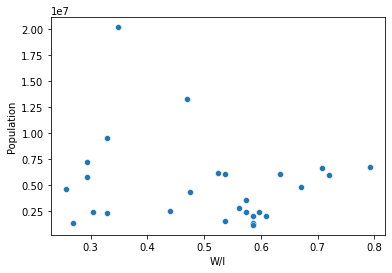

In [73]:
sns.scatterplot(x='W/l', y='Population', data=regions_nba)

In [75]:
stats.pearsonr(regions_nba['Population'], regions_nba['W/l'])

(-0.17657160252844617, 0.36874741604463)

# Now MLB Dataset

In [77]:
mlb_df = pd.read_csv('mlb.csv')
mlb_df = mlb_df[mlb_df['year'] == 2018]
mlb_df.head()

,team,W,L,W-L%,GB,year,League
0,Boston Red Sox,108,54,0.667,--,2018,MLB
1,New York Yankees,100,62,0.617,8.0,2018,MLB
2,Tampa Bay Rays,90,72,0.556,18.0,2018,MLB
3,Toronto Blue Jays,73,89,0.451,35.0,2018,MLB
4,Baltimore Orioles,47,115,0.290,61.0,2018,MLB


In [85]:
cols = ['team', 'W', 'L', 'year']
mlb_df = mlb_df[cols]

In [78]:
mlb_df.dtypes

team       object
W           int64
L           int64
W-L%      float64
GB         object
year        int64
League     object
dtype: object

In [79]:
region_mapping = {}
def test_run(row):
    teams = row['MLB']
    if isinstance(teams, str):
        res = re.findall(r'([A-Z]{1,1}[a-z]+)', teams)
        if res:
            for team in res:
                region_mapping[team] = row['Metropolitan area']
        else:
            region_mapping[teams] = row['Metropolitan area']
    return row

In [80]:
cities.apply(test_run, axis=1);

In [81]:
region_mapping

{'Angels': 'Los Angeles',
 'Astros': 'Houston',
 'Athletics': 'San Francisco Bay Area',
 'Blue': 'Toronto',
 'Braves': 'Atlanta',
 'Brewers': 'Milwaukee',
 'Cardinals': 'St. Louis',
 'Cubs': 'Chicago',
 'Diamondbacks': 'Phoenix',
 'Dodgers': 'Los Angeles',
 'Giants': 'San Francisco Bay Area',
 'Indians': 'Cleveland',
 'Jays': 'Toronto',
 'Mariners': 'Seattle',
 'Marlins': 'Miami–Fort Lauderdale',
 'Mets': 'New York City',
 'Nationals': 'Washington, D.C.',
 'Orioles': 'Baltimore',
 'Padres': 'San Diego',
 'Phillies': 'Philadelphia',
 'Pirates': 'Pittsburgh',
 'Rangers': 'Dallas–Fort Worth',
 'Rays': 'Tampa Bay Area',
 'Red': 'Boston',
 'Reds': 'Cincinnati',
 'Rockies': 'Denver',
 'Royals': 'Kansas City',
 'Sox': 'Boston',
 'Tigers': 'Detroit',
 'Twins': 'Minneapolis–Saint Paul',
 'White': 'Chicago',
 'Yankees': 'New York City',
 '—': 'Regina'}

In [87]:
def create_region(row):
    names = row['team'].split()
    if names[-1] in region_mapping:
        if 'Sox' in names:
            return region_mapping[names[-2]]
            
        return region_mapping[names[-1]]

mlb_df['Metropolitan area'] = mlb_df.apply(create_region, axis=1)

In [88]:
mlb_df.head()

,team,W,L,year,Metropolitan area
0,Boston Red Sox,108,54,2018,Boston
1,New York Yankees,100,62,2018,New York City
2,Tampa Bay Rays,90,72,2018,Tampa Bay Area
3,Toronto Blue Jays,73,89,2018,Toronto
4,Baltimore Orioles,47,115,2018,Baltimore


In [89]:
mlb_df['W/L'] = mlb_df['W'] / (mlb_df['W'] + mlb_df['L'])

In [90]:
combined_df = pd.merge(cities, mlb_df, how='inner', on='Metropolitan area')

In [91]:
regions_mlb = combined_df.groupby('Metropolitan area').mean()
regions_mlb.head()

,Population,W,L,year,W/L
Metropolitan area,,,,,
Atlanta,5789700.0,90.0,72.0,2018.0,0.555556
Baltimore,2798886.0,47.0,115.0,2018.0,0.290123
Boston,4794447.0,108.0,54.0,2018.0,0.666667
Chicago,9512999.0,78.5,84.0,2018.0,0.482769
Cincinnati,2165139.0,67.0,95.0,2018.0,0.413580


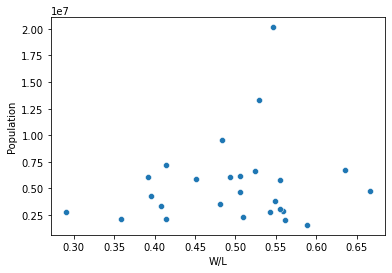

In [92]:
sns.scatterplot(x='W/L', y='Population', data=regions_mlb)

In [93]:
stats.pearsonr(regions['Population'], regions['W/L'])

(0.012486162921209907, 0.9497182859911791)

# Now the last NFL Dataset

In [94]:
nfl_df = pd.read_csv('nfl.csv')
nfl_df.dtypes

DSRS      object
L         object
League    object
MoV       object
OSRS      object
PA        object
PD        object
PF        object
SRS       object
SoS       object
T         object
W         object
W-L%      object
team      object
year       int64
dtype: object

In [95]:
nfl_df = nfl_df[nfl_df['year'] == 2018]
cols = ['team', 'W', 'L', 'year']
nfl_df = nfl_df[cols]
nfl_df.head()

,team,W,L,year
0,AFC East,AFC East,AFC East,2018
1,New England Patriots*,11,5,2018
2,Miami Dolphins,7,9,2018
3,Buffalo Bills,6,10,2018
4,New York Jets,4,12,2018


In [96]:
# removing unnecessary rows
mask = nfl_df['W'].str.isdigit()
nfl_df = nfl_df[mask]
nfl_df.head()

,team,W,L,year
1,New England Patriots*,11,5,2018
2,Miami Dolphins,7,9,2018
3,Buffalo Bills,6,10,2018
4,New York Jets,4,12,2018
6,Baltimore Ravens*,10,6,2018


In [97]:
nfl_df['team'] = nfl_df['team'].str.replace('*', '').str.replace('+', '')

In [98]:
nfl_df.head()

,team,W,L,year
1,New England Patriots,11,5,2018
2,Miami Dolphins,7,9,2018
3,Buffalo Bills,6,10,2018
4,New York Jets,4,12,2018
6,Baltimore Ravens,10,6,2018


In [101]:
region_mapping = {}
def test_run(row):
    teams = row['NFL']
    if isinstance(teams, str):
        res = re.findall(r'([A-Z]{1,1}[a-z]+)', teams)
        if res:
            for team in res:
                region_mapping[team] = row['Metropolitan area']
        else:
            region_mapping[teams] = row['Metropolitan area']
    return row

In [102]:
cities.apply(test_run, axis=1);

In [103]:
len(region_mapping), region_mapping

(36,
 {'49ers': 'San Francisco Bay Area',
  'Bears': 'Chicago',
  'Bengals': 'Cincinnati',
  'Bills': 'Buffalo',
  'Broncos': 'Denver',
  'Browns': 'Cleveland',
  'Buccaneers': 'Tampa Bay Area',
  'Cardinals': 'Phoenix',
  'Chargers': 'Los Angeles',
  'Chiefs': 'Kansas City',
  'Colts': 'Indianapolis',
  'Cowboys': 'Dallas–Fort Worth',
  'Dolphins': 'Miami–Fort Lauderdale',
  'Eagles': 'Philadelphia',
  'Falcons': 'Atlanta',
  'Football': 'Washington, D.C.',
  'Giants': 'New York City',
  'Jaguars': 'Jacksonville',
  'Jets': 'New York City',
  'Lions': 'Detroit',
  'Packers': 'Green Bay',
  'Panthers': 'Charlotte',
  'Patriots': 'Boston',
  'Raiders': 'Las Vegas',
  'Rams': 'Los Angeles',
  'Ravens': 'Baltimore',
  'Saints': 'New Orleans',
  'Seahawks': 'Seattle',
  'Steelers': 'Pittsburgh',
  'Team': 'Washington, D.C.',
  'Texans': 'Houston',
  'Titans': 'Nashville',
  'Vikings': 'Minneapolis–Saint Paul',
  'Washington': 'Washington, D.C.',
  '—': 'Regina',
  '— ': 'Toronto'})

In [104]:
def create_region(row):
    names = row['team'].split()
    if names[-1] in region_mapping:
        return region_mapping[names[-1]]

In [105]:
nfl_df['Metropolitan area'] = nfl_df.apply(create_region, axis=1)

In [106]:
nfl_df.head()

,team,W,L,year,Metropolitan area
1,New England Patriots,11,5,2018,Boston
2,Miami Dolphins,7,9,2018,Miami–Fort Lauderdale
3,Buffalo Bills,6,10,2018,Buffalo
4,New York Jets,4,12,2018,New York City
6,Baltimore Ravens,10,6,2018,Baltimore


In [107]:
nfl_df = nfl_df.astype({'W': int, 'L': int})

In [108]:
nfl_df['W/L'] = nfl_df['W'] / (nfl_df['W'] + nfl_df['L'])

In [109]:
nfl_df.head()

,team,W,L,year,Metropolitan area,W/L
1,New England Patriots,11,5,2018,Boston,0.6875
2,Miami Dolphins,7,9,2018,Miami–Fort Lauderdale,0.4375
3,Buffalo Bills,6,10,2018,Buffalo,0.3750
4,New York Jets,4,12,2018,New York City,0.2500
6,Baltimore Ravens,10,6,2018,Baltimore,0.6250


In [111]:
combined_df = pd.merge(cities, nfl_df, how='inner', on='Metropolitan area')
regions_nfl = combined_df.groupby('Metropolitan area').mean()

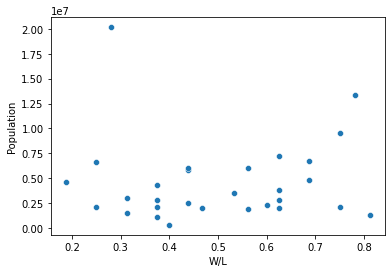

In [112]:
sns.scatterplot(x='W/L', y='Population', data=regions_nfl)

In [113]:
stats.pearsonr(regions_nfl['Population'], regions_nfl['W/L'])

(0.040399329749847245, 0.8351727664570853)

In [ ]:
region_nfl_nba = pd.merge(regions_nfl, regions_nba, how='inner', on='Metropolitan area')
region_nfl_nba

,Population_x,L,W,year,W/L,W/l,Population_y
Metropolitan area,,,,,,,
Atlanta,5789700.0,9.0,7.0,2018.0,0.437500,0.292683,5789700
Boston,4794447.0,5.0,11.0,2018.0,0.687500,0.670732,4794447
Charlotte,2474314.0,9.0,7.0,2018.0,0.437500,0.439024,2474314
Chicago,9512999.0,4.0,12.0,2018.0,0.750000,0.329268,9512999
Cleveland,2055612.0,8.0,7.0,2018.0,0.466667,0.609756,2055612
Dallas–Fort Worth,7233323.0,6.0,10.0,2018.0,0.625000,0.292683,7233323
Denver,2853077.0,10.0,6.0,2018.0,0.375000,0.560976,2853077
Detroit,4297617.0,10.0,6.0,2018.0,0.375000,0.475610,4297617
Houston,6772470.0,5.0,11.0,2018.0,0.687500,0.792683,6772470


In [ ]:
stats.ttest_ind(region_nfl_nba['W/L'], region_nfl_nba['W/l'])

Ttest_indResult(statistic=0.14910444371585257, pvalue=0.8823521296553065)

In [ ]:
region_nfl_nhl = pd.merge(regions_nfl, regions_nhl, how='inner', on='Metropolitan area')
region_nfl_nhl.head()

,Population_x,L,W,year,W/L_x,Population_y,W/L_y
Metropolitan area,,,,,,,
Boston,4794447.0,5.0,11.0,2018.0,0.6875,4794447,0.714286
Buffalo,1132804.0,10.0,6.0,2018.0,0.3750,1132804,0.357143
Chicago,9512999.0,4.0,12.0,2018.0,0.7500,9512999,0.458333
Dallas–Fort Worth,7233323.0,6.0,10.0,2018.0,0.6250,7233323,0.567568
Denver,2853077.0,10.0,6.0,2018.0,0.3750,2853077,0.589041


In [ ]:
stats.ttest_ind(region_nfl_nhl['W/L_x'], region_nfl_nhl['W/L_y'])

Ttest_indResult(statistic=-2.186482591730893, pvalue=0.036206737782513654)

In [ ]:
region_nfl_mlb = pd.merge(regions_nfl, regions_mlb, how='inner', on='Metropolitan area')
region_nfl_mlb.head()

,Population_x,L_x,W_x,year_x,W/L_x,Population_y,W_y,L_y,W-L%,year_y,W/L_y
Metropolitan area,,,,,,,,,,,
Atlanta,5789700.0,9.0,7.0,2018.0,0.4375,5789700.0,90.0,72.0,0.556,2018.0,0.555556
Baltimore,2798886.0,6.0,10.0,2018.0,0.6250,2798886.0,47.0,115.0,0.290,2018.0,0.290123
Boston,4794447.0,5.0,11.0,2018.0,0.6875,4794447.0,108.0,54.0,0.667,2018.0,0.666667
Chicago,9512999.0,4.0,12.0,2018.0,0.7500,9512999.0,78.5,84.0,0.483,2018.0,0.482769
Cincinnati,2165139.0,10.0,6.0,2018.0,0.3750,2165139.0,67.0,95.0,0.414,2018.0,0.413580


In [ ]:
stats.ttest_ind(region_nfl_mlb['W/L_x'], region_nfl_mlb['W/L_y'])

Ttest_indResult(statistic=0.3344104410458205, pvalue=0.7398170172065339)

In [ ]:
region_nba_nhl = pd.merge(regions_nba, regions_nhl, how='inner', on='Metropolitan area')
region_nba_nhl.head()

,W/l,Population_x,Population_y,W/L
Metropolitan area,,,,
Boston,0.670732,4794447,4794447,0.714286
Chicago,0.329268,9512999,9512999,0.458333
Dallas–Fort Worth,0.292683,7233323,7233323,0.567568
Denver,0.560976,2853077,2853077,0.589041
Detroit,0.475610,4297617,4297617,0.434783


In [ ]:
stats.ttest_ind(region_nba_nhl['W/L'], region_nba_nhl['W/l'])

Ttest_indResult(statistic=1.5050389212319741, pvalue=0.14436675651787648)

In [ ]:
stats.ttest_rel(region_nba_nhl['W/L'], region_nba_nhl['W/l'])

Ttest_relResult(statistic=2.593073319204328, pvalue=0.022297049643438753)